Import libraries
----------------

In [1]:
import pandas as pd
from utils import get_billboard, plot_hits

/Users/machow/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Get the `id` for your Favorite Artist
-----------------------------------

1. Use the function `get_billboard` to find your favorite artist.
2.  Assign result to variable `d_artist`.
3. Assign their `artist_id` in the data to the variable `artist_id`.

In [2]:
d_artist = get_billboard('http://billboard.modulo.site/search/artist?q=The Cure')

artist_id = d_artist[0]['artist_id']

Get your artist's hit songs and albums
--------------------------------------

Use the function `get_billboard`

1. What kind of object does it return?
2. How many albums are there?
3. How many songs are there?
4. What is the last song on the list?

In [3]:
d_hits = get_billboard('http://billboard.modulo.site/artist/%s' % artist_id)

# number of albums
len(d_hits['albums'])

# number of songs
len(d_hits['songs'])

# last song
d_hits['songs'][-1]

{'highest_rank': '54',
 'song_id': '16241',
 'song_name': 'Why Can t I Be You?',
 'spotify_id': None,
 'weeks_on_chart': '12'}

Plot Data
---------

1. pass only the list of songs in `d_hits` to `plot_hits`

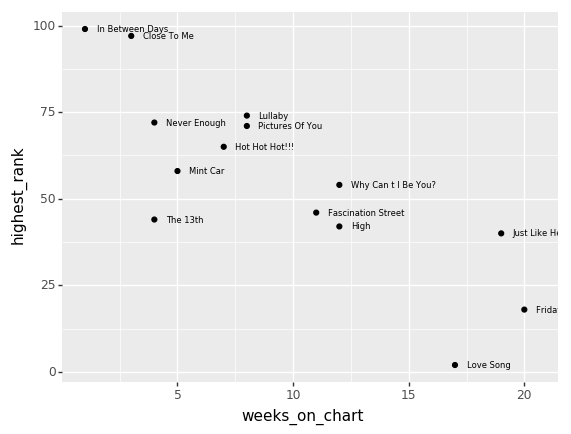

<ggplot: (280997212)>

In [4]:
plot_hits(d_hits['songs'])

Finally, put the hit songs of two artists into a single list and plot
-----------------------------------------------------------------

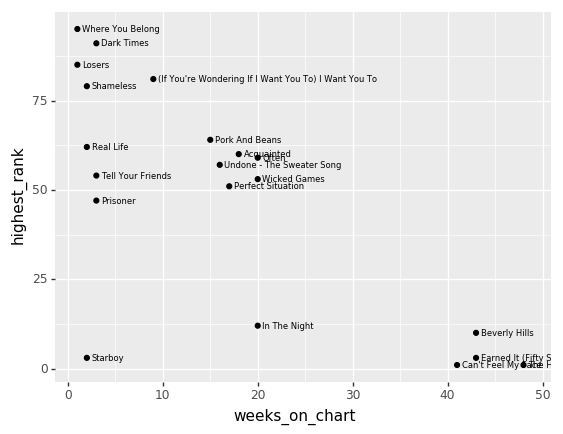

<ggplot: (-9223372036571262874)>

In [5]:
# Need to repeat steps above for two artists
# and add the songs to all_songs somehow...
all_songs = []

# artist one's songs
id_weezer = '431262'
hits_weezer = get_billboard('http://billboard.modulo.site/artist/%s' % id_weezer)
songs_weezer = hits_weezer['songs']

# artist two's songs
id_weeknd = '419413'
hits_weeknd = get_billboard('http://billboard.modulo.site/artist/%s' % id_weeknd)
songs_weeknd = hits_weeknd['songs']

# extend all_songs to include both
all_songs.extend(songs_weezer)
all_songs.extend(songs_weeknd)

# plot
plot_hits(all_songs)

Bonus Sections
==============

(Advanced) Taking a look at Pandas
----------------------------------------------------------------------

In [6]:
import pandas as pd

# uncomment below to see a convenient way to view the data
# df = pd.DataFrame(d_hits['songs'])
# df

(Advanced) Taking a look at plotnine
------------------------------------

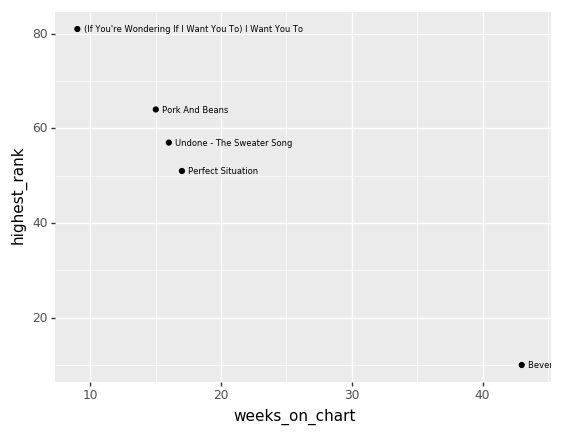

<ggplot: (283523525)>

In [7]:
import pandas as pd
from plotnine import ggplot
from plotnine import geom_text, geom_point, aes

# plot assumes that there is a list of songs, like the one
# passed to plot_hits
song_id = '431262'
data = get_billboard('http://billboard.modulo.site/artist/%s' % song_id)

# cleans up the data, since highest_rank and weeks_on_chart
# are both represented as strings
df = pd.DataFrame(data['songs'])
df['highest_rank'] = df['highest_rank'].astype(int)
df['weeks_on_chart'] = df['weeks_on_chart'].astype(int)

# actual plotting code
ggplot(df, aes(x = 'weeks_on_chart', y = 'highest_rank')) \
    + geom_point() \
    + geom_text(aes(label = 'song_name'), nudge_x = .5, size = 6, ha = 'left')

(Advanced) Choose one song, and get its first year on the charts
------------------------------------------------

1. Assign `first_week` to be the date of the earliest ranking
2. Assign `first_year` to be just the year, pulled from `first_week`
3. Make sure `first_year` is a python `int` type

In [8]:
song_id = '17687'

d_hist = get_billboard('http://billboard.modulo.site/music/song/%s' % song_id)

# 1. get the date for the earliest ranking
first_week = d_hist['rankings'][0]['date']

# 2. get just the year
first_year = first_week[:4]

# 3. check its type
print(type(first_year))

# 4. make into an integer
first_year = int(first_year)

<class 'str'>
